In [46]:
import sys
sys.path.insert(0, '../../src')
import sofa
print(sofa)

<module 'sofa' from 'c:\\myenv\\lib\\site-packages\\sofa\\__init__.py'>


In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline

In [48]:
def plot_coordinates(coords, title):
    x0 = coords
    n0 = coords
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    q = ax.quiver(x0[:, 0], x0[:, 1], x0[:, 2], n0[:, 0],
                  n0[:, 1], n0[:, 2], length=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(title)
    return q

APIName: ARI SOFA API for Matlab/Octave
APIVersion: 0.4.0
ApplicationName: Sample of the SOFA API
ApplicationVersion: 0.3.1
AuthorContact: kwatanabe@akita-pu.ac.jp
Comment: Acoustically measured with a circular loudspeaker array and post processed by temporal windowing, gain calibration and low-frequency compensation.
Conventions: SOFA
DataType: FIR
DatabaseName: RIEC
DateCreated: 2014-04-03 14:37:30
DateModified: 2014-03-28 09:57:05
History: Converted from the RIEC database
License: Freely accessible for non-profit academic purposes.
ListenerShortName: sub1
Organization: Faculty of Systems Science and Technology, Akita Prefectural University
Origin: http://www.riec.tohoku.ac.jp/pub/hrtf/
References: Watanabe, K., Iwaya, Y., Suzuki, Y., Takane, S., and Sato (2014) "Dataset of head-related transfer functions measured with a circular loudspeaker array", J Acoust. Sci. & Tech, Volume:Pages.
RoomType: free field
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVersion: 0.4
Title: HRTFs


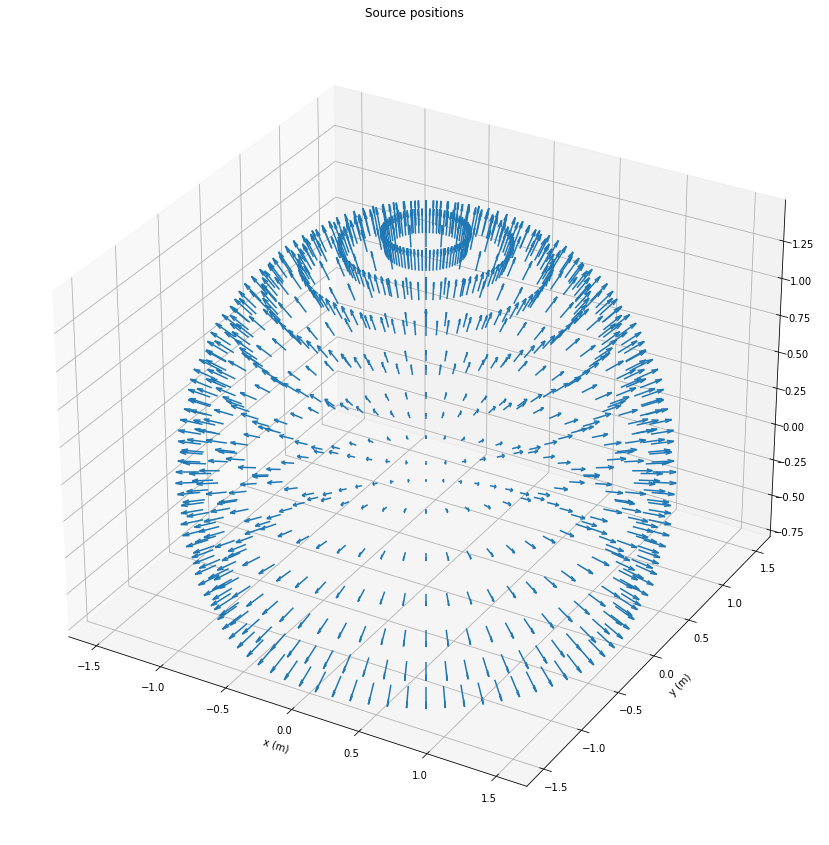

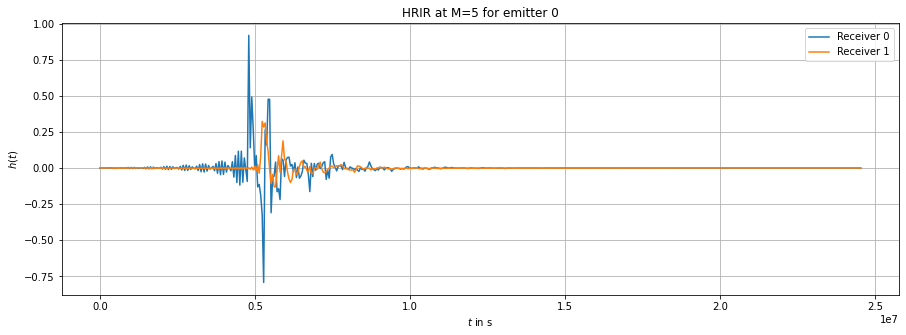

In [49]:
HRTF_path = "/IM/BLS-IM-Repositories/VBA/VBACore/RIEC_HRTF/RIEC_hrir_subject_001.sofa"
HRTF = sofa.Database.open(HRTF_path)
HRTF.Metadata.dump()

# plot Source positions
source_positions = HRTF.Source.Position.get_values(system="cartesian")
plot_coordinates(source_positions, 'Source positions');

# plot Data.IR at M=5 for E=0
measurement = 5
emitter = 0
legend = []

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_values(indices={"M":measurement})

plt.figure(figsize=(15, 5))
for receiver in np.arange(HRTF.Dimensions.R):
    plt.plot(t, HRTF.Data.IR.get_values(indices={"M":measurement, "R":receiver, "E":emitter}))
    legend.append('Receiver {0}'.format(receiver))
plt.title('HRIR at M={0} for emitter {1}'.format(measurement, emitter))
plt.legend(legend)
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()

HRTF.close()

In [50]:
HRTF = sofa.Database.open(HRTF_path)

print("Source positions 0 to 4 in spherical coordinates")
print(np.round(HRTF.Source.Position.get_values(indices={"M":slice(5)}, system="spherical", angle_unit="degree"),2))

print("Stationary local Emitter position")
print(np.round(HRTF.Emitter.Position.get_values(system="spherical", angle_unit="degree"),2))

print("Global Emitter positions 0 to 4")
# print(np.round(HRTF.Emitter.Position.get_global_values(indices={"M":slice(5)}, system="spherical", angle_unit="degree"),2))

print("Stationary Listener position")
print(np.round(HRTF.Listener.Position.get_values(system="spherical", angle_unit="degree"),2))

print("Listener positions 0 to 4 relative to Emitter")
# print(np.round(HRTF.Listener.Position.get_relative_values(HRTF.Emitter, indices={"M":slice(5)}, system="spherical", angle_unit="degree"),2))

HRTF.close()

Source positions 0 to 4 in spherical coordinates
[[  0.  -30.    1.5]
 [  5.  -30.    1.5]
 [ 10.  -30.    1.5]
 [ 15.  -30.    1.5]
 [ 20.  -30.    1.5]]
Stationary local Emitter position
[[[0.]
  [0.]
  [0.]]]
Global Emitter positions 0 to 4
Stationary Listener position
[[0. 0. 0.]]
Listener positions 0 to 4 relative to Emitter


In [51]:
print(sofa.conventions.implemented())

['GeneralFIR', 'GeneralTF', 'SimpleFreeFieldHRIR', 'GeneralFIRE', 'MultiSpeakerBRIR', 'SimpleFreeFieldTF', 'SimpleFreeFieldSOS', 'SingleRoomDRIR']


In [52]:
HRIR_path = "free_field_HRIR.sofa"
measurements = 5
data_length = 1000
max_string_length = 128

# we will add this one later
receivers = 2

In [53]:
HRIR = sofa.Database.create(HRIR_path, "SimpleFreeFieldHRIR",
                            dimensions={"M": measurements, "N": data_length, "S": max_string_length})

In [54]:
try: HRIR.Listener.initialize()
except Exception as e: print("Initializing without Position error: {0}".format(e))

try: HRIR.Listener.initialize(fixed=["Position"])
except Exception as e: print("Initializing with incomplete convention requirements: {0}".format(e))

HRIR.Listener.initialize(fixed=["Position", "View", "Up"])
print("Successfully initialized Listener with fixed Position, View and Up.")

Initializing without Position error: Listener.initialize: Missing 'Position' in fixed or variances argument
Initializing with incomplete convention requirements: must have Listener Up and View
Successfully initialized Listener with fixed Position, View and Up.


In [55]:
HRIR.Source.initialize(variances=["Position"])
HRIR.Source.initialize_coordinates(variances=["View"])

HRIR.Source.initialize_coordinates(fixed=["Position"]) # no change, message or output.

In [56]:
HRIR.Receiver.initialize(fixed=["Position"], count=receivers)

try: HRIR.Emitter.initialize(fixed=["Position"], count=2)
except Exception as e: print("Initializing with Emitter count not allowed in convention error: {0}".format(e))
HRIR.Emitter.initialize(fixed=["Position"])

Initializing with Emitter count not allowed in convention error: must have 1 Emitter


In [57]:
print(HRIR.Data.Type)
HRIR.Data.initialize(variances=["Delay"])

FIR


In [58]:
HRIR.Room.Type = "shoebox"
HRIR.Room.initialize(variances=["CornerA", "CornerB"])

HRIR.Room.create_attribute("Location", "various recording locations")
HRIR.Room.create_variable("Temperature", ("M",))
HRIR.Room.Temperature.Units = "kelvin"
HRIR.Room.Temperature = 150
HRIR.Room.create_string_array("Description", ("M", "S"))

print(HRIR.Room.Location)
print(HRIR.Room.Temperature.get_values(), HRIR.Room.Temperature.Units)

various recording locations
[150. 150. 150. 150. 150.] kelvin


In [59]:
print("Attributes and metadata")
HRIR.Metadata.dump()

Attributes and metadata
APIName: python-SOFA
APIVersion: 0.2
AuthorContact: 
Conventions: SOFA
DataType: FIR
DatabaseName: 
DateCreated: 2021-12-10 13:29:31
DateModified: 
EmitterDescription: 
License: No license provided, ask the author for permission
ListenerDescription: 
ListenerShortName: 
Organization: 
ReceiverDescription: 
RoomLocation: various recording locations
RoomType: shoebox
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVersion: 1.0
SourceDescription: 
Title: 
Version: 1.0


In [60]:
print("Dimensions")
HRIR.Dimensions.dump()

Dimensions
M: 5
N: 1000
S: 128
I: 1
C: 3
R: 2
E: 1


In [61]:
print("Variables")
HRIR.Variables.dump()

Variables
Data.Delay: ('M', 'R')
Data.IR: ('M', 'R', 'N')
Data.SamplingRate: ('I',)
EmitterPosition: ('E', 'C', 'I')
ListenerPosition: ('I', 'C')
ListenerUp: ('I', 'C')
ListenerView: ('I', 'C')
ReceiverPosition: ('R', 'C', 'I')
RoomCornerA: ('M', 'C')
RoomCornerB: ('M', 'C')
RoomDescription: ('M', 'S')
RoomTemperature: ('M',)
SourcePosition: ('M', 'C')
SourceView: ('M', 'C')


In [62]:
HRIR.close()